# The Tabula Recta

To ease the use of multiple ciphertext alphabets Johannes Trithemius created a 26 x 26 grid of letters formed by writing the 26 different Caesar alphabets, starting with `key = 0` and progressing to `key = 25`. The result is 26 rows of ordered letters, each offset by one character.

![alt-text](tabula-recta-image.svg "tabula recta grid")

You can look up your plaintext letter in the top row, and the use the labels along the side to determine which Caesar key you would use (`A = 0, B = 1, ...` per usual) and then look the character in the same column and row as the plaintext letter and key letter to determine the ciphertext letter. To reverse the process, you would select the row that corresponds to the key you are using, find your ciphertext letter in that row, and follow up the column to the letter at the top to determine the plaintext letter.

The grid allows for quick substitution of letters and changing of keys using a pattern or rule defined by each cipher. While it may have been easier to define these rules using equations and modulo arithmetic, the intent of the tabula recta was to allow access to this cutting edge cryptography without the need to be educated in mathematics and/or calculation.

## A Simple Polygraphic Cipher

A simple example of a polygraphic cipher would be alternating between the keys `3` and `10`, which correspond to rows `D` and `K` in the tabula recta. A common way we'll see to organize the enciphering of a polygraphic cipher is to fully write out the plaintext with the key for each character written above. We'll call the string of characters that represent the keys the __keystream__. For a plaintext message of `equality` you'd have:

```
keystream: DKDKDKDK
plaintext: equality
```

You could then look up `e` in the top row and `D` in the leftmost column and find their intersection point of `H` in the table. Repeating for each letter in the message:

```
 keystream: DKDKDKDK
 plaintext: equality
ciphertext: HAXKOSWI
```

To decipher the message, you would look up `D` in the leftmost column, go across the row until you find `H`, and then go up that column to find the plaintext letter `e` at the top.

__The Tabula Recta is the basis for all other ciphers covered in this chapter. Once you learn how to encipher and decipher messages using a keystream and the tabula recta, the only difference between the different ciphers is how you generate the key.__

## Mathematizing this Cipher

We could introduce a bit of mathematics from the Caesar cipher to make this process a bit more familiar to the approaches we've done in the past. Instead of treating letters as letters, we can treat them as their corresponding positional numbers in the alphabet. 

### Enciphering a Message
Since each row in the tabula recta was created by implementing a Caesar shift on the plaintext alphabet with a key that corresponds to the row letter, we can just Caesar shift each letter mathematically by adding the keystream value to the plaintext value.

```
keystream:  DKDKDKDK
plaintext:  equality

 keystream: 3 10  3 10  3 10  3 10
 plaintext: 4 16 20  0 11  8 19 24
       add: 7 26 23 10 14 18 22 34
    mod 26: 7  0 23 10 14 18 22  8
ciphertext: H  A  X  K  O  S  W  I
```

### Deciphering a Message
To decipher a message, you use the Caesar decipher algorithm to subtract the key value from the ciphertext value.
```
 keystream:  DKDKDKDK
ciphertext:  HAXKOSWI

 keystream: 3  10   3  10   3  10   3  10
ciphertext: 7   0  23  10  14  18  22   8
  subtract: 4 -10  20   0  11   8  19  -2
    mod 26: 4  16  20   0  11   8  19  24
 plaintext: e   q   u   a   l   i   t   y
```

## Impact on Frequency Analysis

If using more than one key, and therefore more than one cipher alphabet, is supposed to help thwart frequency analysis then let's see how well our two key cipher disguises plaintext frequencies in the ciphertext. Below is a barchart that used the text of Pride and Prejudice with the same cipher to illustrate it's impact on letter frequency.

In [9]:
from seaborn import barplot

def textClean( text ):
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    text = text.upper()
    cleaned = ''
    for char in text:
        if char in LETTERS:
            cleaned += char
            
    return cleaned

def letterFrequency(text):
    text = textClean(text)
    frequencyList = []
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for char in LETTERS:
        frequencyList.append( 100 * text.count(char) / len(text))
    
    return frequencyList

def caesarEncipher(text, key):
    plaintext = textClean(text)
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    ciphertext = ''
    
    for char in plaintext:
        ciphertext += LETTERS[ (LETTERS.find(char) + key) % 26 ]
    
    return ciphertext


In [10]:
with open('pride-and-prejudice.txt', encoding="utf8") as f:
    text = textClean(f.read())

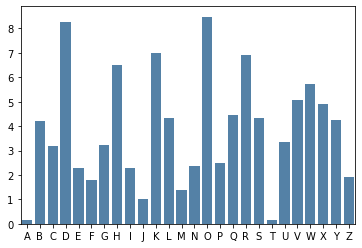

In [12]:
ciphertext = ''

for i in range(0, len(text)):
    if i % 2 == 0:
        ciphertext += caesarEncipher( text[i], 3)
    else:
        ciphertext += caesarEncipher( text[i], 10)

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = letterFrequency(ciphertext)

barplot(labels, values, color='steelblue');

Looking at the results, you can see that there are no letters with frequency much higher than 8%, and much fewer letters than expected with very low frequency. Using two keys appears to have pulled the overall frequencies towards the middle. This characteristic is what this type of cipher is aiming for: making it harder to determine which character is which.